# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Откройте файл с данными и изучите общую информацию. 

Добрый день! Импортируем библитотеки и предосталавенный нам файл real_estate_data.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

Смотрим общую инорфмацию и файле.

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Имеем 23699 строк и 22 колонки.

В целом нареканий на оформление столбцов нету, разве что parks_around3000 и ponds_around3000 можно привести к "змеиному регистру",  но я оставлю как есть, а  cityCenters_nearest переменую city_centers_nearest

Построим общую гистограмму для всех числовых столбцов таблицы:

In [5]:
df = df.rename(columns={"cityCenters_nearest":"city_centers_nearest"})

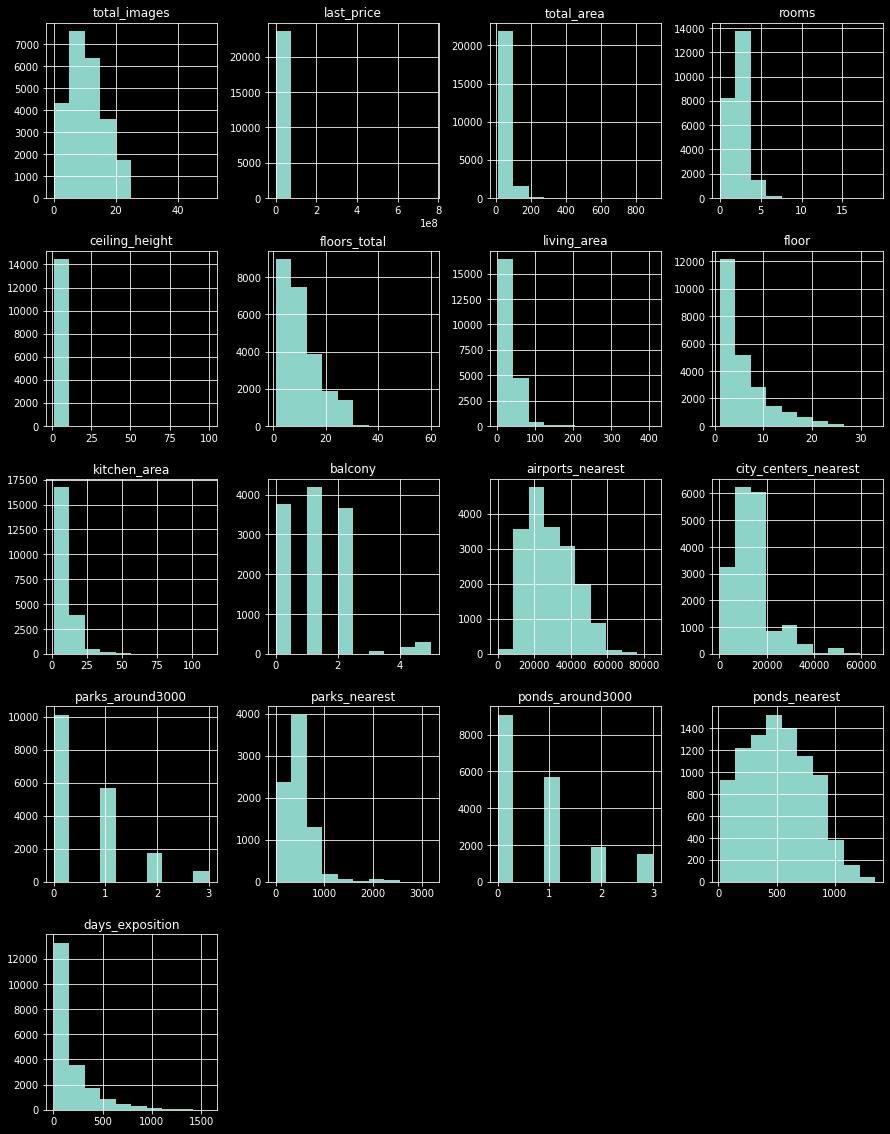

In [6]:
df.hist(figsize=(15, 20));

Здесь мы можем наблюдать распределение параметров: сколько дней было размещено объявление, общая и жилая площадь, площадь кухни, этаж, количество этажей в доме. Настораживает график цены на момент снятия с публикации. Графики количества парков, водоемов и балконов имеют логичные значения.

# Предобработка данных

In [7]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [8]:
pd.DataFrame(df.isna().mean()*100).sort_values(by=0, ascending=False).style.set_precision(1).background_gradient('coolwarm')

,0
is_apartment,88.3
parks_nearest,65.9
ponds_nearest,61.6
balcony,48.6
ceiling_height,38.8
airports_nearest,23.4
city_centers_nearest,23.3
ponds_around3000,23.3
parks_around3000,23.3
days_exposition,13.4


Большое колличество пропусков: ceiling_height — высота потолков (м), is_apartment — апартаменты (булев тип),
balcony — число балконов, airports_nearest — расстояние до ближайшего аэропорта в метрах (м), parks_nearest — расстояние до ближайшего парка (м), cityCenters_nearest — расстояние до центра города (м), ponds_around3000 — число водоёмов в радиусе 3 км, ponds_nearest — расстояние до ближайшего водоёма (м)
 
Так же пропуска наблюдается в колонках: floors_total — всего этажей в доме, living_area — жилая площадь в квадратных метрах (м²), kitchen_area — площадь кухни в квадратных метрах (м²), days_exposition — сколько дней было размещено объявление (от публикации до снятия), locality_name — название населённого пункта.

Будем разбираться что можно с этим сделать...

In [9]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [10]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

## is_apartment — апартаменты

In [11]:
df["is_apartment"].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [12]:
df["is_apartment"].dtype

dtype('O')

Насколько я понимаю апартаменты не являются квартирой, я заменю NaN на 0.
Источник информации: https://journal.tinkoff.ru/opasnosti-apartamentov/
Тип данных меняем на буллевой в соответствии с заданием.

In [13]:
df["is_apartment"] = df["is_apartment"].fillna(value = 0)
df["is_apartment"] = df["is_apartment"].astype('bool')
df["is_apartment"].dtype

dtype('bool')

In [14]:
df["is_apartment"].isna().sum()

0

## parks_nearest — расстояние до ближайшего парка (м) 

In [15]:
df["parks_nearest"]

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

In [16]:
(df["parks_nearest"] % 1  == 0).all()

False

У нас тут целые числа :)

In [17]:
df["parks_nearest"].isna().sum()

15620

Не у каждой квариты имеется рядом парк, я заменю NaN на 0. Меняем тип данных на int

In [18]:
df["parks_nearest"] = df["parks_nearest"].fillna(value = 0)
df["parks_nearest"] = df["parks_nearest"].astype('Int64')
df["parks_nearest"].dtype

Int64Dtype()

In [19]:
df["parks_nearest"].isna().sum()

0

<AxesSubplot:>

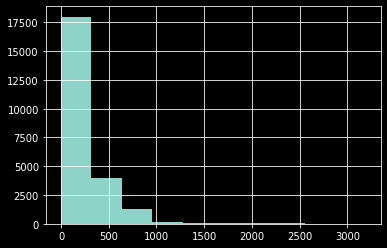

In [20]:
df["parks_nearest"].hist()

## ponds_nearest — расстояние до ближайшего водоёма (м)  

In [21]:
df["ponds_nearest"].isna().mean()

0.6155955947508334

In [22]:
(df["ponds_nearest"] % 1  == 0).all()

False

Тут всё Анлогично с парком, но значения с плавающей точкой - Тип данных оставляем.

In [23]:
df["parks_nearest"].isna().mean()

0.0

<AxesSubplot:>

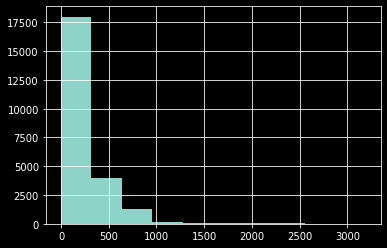

In [24]:
df["parks_nearest"].hist()

## last_price — цена на момент снятия с публикации

In [25]:
df["last_price"].value_counts(dropna = False)

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64

In [26]:
#df.info() Ищу где у меня потерялось так много строк.

In [27]:
df["last_price"].max()

763000000.0

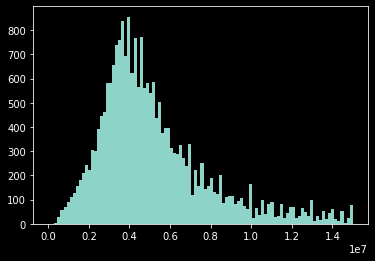

In [28]:
plt.hist(df["last_price"], range=(0, 15000000), bins=100);

Тут видно что средняя цена кв. примерно 3.8 мл. руб. Но есть квартиры для "богачей" цена которых больше 12мл, рассмотрим их.

In [29]:
df[df["last_price"] >= 120000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.00,2,False,...,50.00,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295,3.0,190.0,342.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.00,3,False,...,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0.0,0,1.0,603.0,NaN
1300,14,120000000.0,280.0,2018-07-12T00:00:00,5,4.70,4.0,162.00,3,False,...,30.00,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464,3.0,339.0,225.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,False,...,40.00,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519,3.0,285.0,233.0
1928,11,125000000.0,224.5,2017-01-24T00:00:00,4,NaN,4.0,163.50,3,False,...,30.00,1.0,Санкт-Петербург,22805.0,2335.0,0.0,0,2.0,497.0,174.0
2243,9,130278280.0,304.0,2015-07-24T00:00:00,5,3.11,9.0,NaN,7,False,...,NaN,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164,0.0,NaN,599.0
2536,16,159984000.0,242.4,2015-08-27T00:00:00,4,3.85,9.0,131.00,7,False,...,20.00,0.0,Санкт-Петербург,21946.0,2242.0,1.0,679,1.0,227.0,501.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,False,...,60.00,NaN,Санкт-Петербург,25707.0,4972.0,0.0,0,2.0,210.0,NaN
4996,20,124000000.0,124.5,2017-10-12T00:00:00,4,3.00,4.0,67.20,2,False,...,20.00,NaN,Санкт-Петербург,20399.0,1722.0,3.0,302,3.0,172.0,45.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,False,...,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,0,2.0,198.0,50.0


Уберем их эти объявления стоимостью более 120 млн.

In [30]:
df = df.query("last_price <= 120000000")

Так же поменяем тип данных.

In [31]:
df["last_price"] = df["last_price"].astype('int')
df["last_price"].dtype

dtype('int64')

In [32]:
df["last_price"]

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23666, dtype: int64

In [33]:
df["last_price"].isna().mean()

0.0

## balcony — число балконов

In [34]:
df["balcony"]

0        NaN
1        2.0
2        0.0
3        0.0
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: balcony, Length: 23666, dtype: float64

In [35]:
df["balcony"].value_counts(dropna = False)

NaN    11505
1.0     4192
0.0     3747
2.0     3656
5.0      303
4.0      183
3.0       80
Name: balcony, dtype: int64

In [36]:
df[df["balcony"] == 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000,74.00,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725,1.0,759.0,179.0
42,13,22000000,161.80,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47,1.0,907.0,987.0
116,18,10999000,97.20,2017-11-13T00:00:00,3,2.50,16.0,NaN,16,False,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,0,2.0,390.0,394.0
267,2,14700000,120.00,2018-09-07T00:00:00,3,2.75,20.0,63.0,18,False,...,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627,3.0,77.0,61.0
311,20,12500000,86.00,2018-10-19T00:00:00,3,2.80,25.0,47.0,3,False,...,13.0,5.0,Санкт-Петербург,52192.0,15686.0,0.0,0,1.0,441.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23147,8,5780000,55.00,2017-11-23T00:00:00,2,2.55,10.0,28.6,8,False,...,8.0,5.0,Санкт-Петербург,42447.0,11146.0,1.0,451,0.0,NaN,41.0
23289,13,7000000,88.00,2018-03-02T00:00:00,3,2.50,15.0,54.0,12,False,...,12.0,5.0,Колпино,24501.0,30287.0,1.0,372,0.0,NaN,NaN
23363,10,4300000,52.00,2019-04-21T00:00:00,1,2.70,16.0,28.0,8,False,...,11.0,5.0,посёлок Мурино,NaN,NaN,NaN,0,NaN,NaN,NaN
23526,14,5800000,60.69,2018-03-13T00:00:00,3,2.50,9.0,39.7,2,False,...,6.2,5.0,Санкт-Петербург,51239.0,15954.0,0.0,0,0.0,NaN,30.0


Очень странная ситуация, когда колличество балконов больше чем самих комнат. Я думаю это ошибка связана с чел. фактором и просто перепутали поля ввода колличества комнат/балоконов. Я поменяю их местами. Значения NaN заменю на 0. Так же поменяем тип столбца на int

In [37]:
df.loc[df["balcony"] == 5, "balcony"] = df.loc[df["rooms"] < 5, "rooms"]

In [38]:
df["balcony"].value_counts()

1.0    4217
0.0    3747
2.0    3739
3.0     246
4.0     206
Name: balcony, dtype: int64

In [39]:
df["balcony"] = df["balcony"].fillna(value = 0)

In [40]:
df["balcony"].value_counts()

0.0    15258
1.0     4217
2.0     3739
3.0      246
4.0      206
Name: balcony, dtype: int64

In [41]:
df["balcony"] = df["balcony"].astype('int')
df["balcony"].dtype

dtype('int64')

In [42]:
df["balcony"].isna().mean()

0.0

<AxesSubplot:>

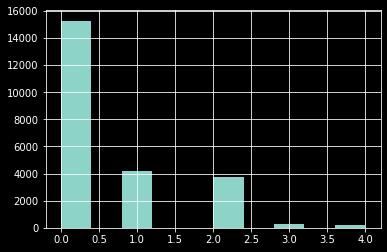

In [43]:
df["balcony"].hist()

## rooms — число комнат

In [44]:
df["rooms"].value_counts(dropna = False)

1     8047
2     7939
3     5810
4     1172
5      318
0      197
6      101
7       54
8       10
9        8
10       3
11       2
14       2
16       1
19       1
15       1
Name: rooms, dtype: int64

Слабо вериться в квартиры с более чем 7 комнатами. Вероятно это выброыс, я их удалю. Пропусков нету.

In [45]:
df = df[df["rooms"] < 7]

In [46]:
df["rooms"].value_counts(dropna = False)

1    8047
2    7939
3    5810
4    1172
5     318
0     197
6     101
Name: rooms, dtype: int64

## ceiling_height — высота потолков (м)

In [47]:
df["ceiling_height"].value_counts(dropna = False)

NaN      9161
2.50     3514
2.60     1646
2.70     1573
3.00     1104
         ... 
5.00        1
27.50       1
6.00        1
3.87        1
26.00       1
Name: ceiling_height, Length: 181, dtype: int64

In [48]:
df["ceiling_height"].sort_values(ascending=False)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
17857     27.0
         ...  
23687      NaN
23690      NaN
23692      NaN
23695      NaN
23696      NaN
Name: ceiling_height, Length: 23584, dtype: float64

In [49]:
df[df["ceiling_height"] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,1,Санкт-Петербург,34963.0,8283.0,1.0,223,3.0,30.0,19.0


Хороший потолок высотой 100 метров, думаю заменить значение высоты по параметру is_apartment (Смотрим по медианее, из-за наших выбрасов - среднее значение тут не подходит). Так же есть квартиры с потолками выше > 4 м. - пираясь на информацию в интеренете: http://expert-home.net/standartnaya-vysota-potolkov-v-kvartire/. Я буду считать, что это аномально.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23584 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23584 non-null  int64  
 1   last_price            23584 non-null  int64  
 2   total_area            23584 non-null  float64
 3   first_day_exposition  23584 non-null  object 
 4   rooms                 23584 non-null  int64  
 5   ceiling_height        14423 non-null  float64
 6   floors_total          23498 non-null  float64
 7   living_area           21692 non-null  float64
 8   floor                 23584 non-null  int64  
 9   is_apartment          23584 non-null  bool   
 10  studio                23584 non-null  bool   
 11  open_plan             23584 non-null  bool   
 12  kitchen_area          21321 non-null  float64
 13  balcony               23584 non-null  int64  
 14  locality_name         23535 non-null  object 
 15  airports_nearest   

In [51]:
df["ceiling_height"] = df["ceiling_height"].apply(lambda x: x*0.1 if x>20 else x) 

In [52]:
df["ceiling_height"].sort_values(ascending=False)

17496    20.0
15061    14.0
22309    10.3
22869    10.0
5863      8.3
         ... 
23687     NaN
23690     NaN
23692     NaN
23695     NaN
23696     NaN
Name: ceiling_height, Length: 23584, dtype: float64

In [53]:
df.loc[:,"ceiling_height"] = df.loc[:,"ceiling_height"].fillna(df["ceiling_height"].median())

In [54]:
df["ceiling_height"].dtype

dtype('float64')

Значения с плавающей точкой - Тип данных оставляем

In [55]:
df["ceiling_height"].isna().sum()

0

<AxesSubplot:>

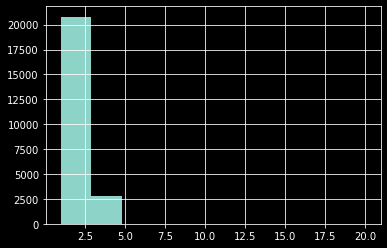

In [56]:
df["ceiling_height"].hist()

## airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

In [57]:
df["airports_nearest"]

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23584, dtype: float64

In [58]:
df["airports_nearest"].value_counts(dropna = False)

NaN        5539
37434.0      61
21928.0      32
44870.0      30
39946.0      30
           ... 
33002.0       1
19168.0       1
35951.0       1
27905.0       1
20875.0       1
Name: airports_nearest, Length: 8223, dtype: int64

<AxesSubplot:>

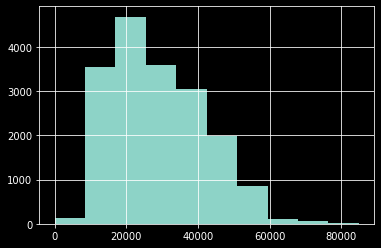

In [59]:
df["airports_nearest"].hist()

In [60]:
df["airports_nearest"].isna().sum()

5539

In [61]:
(df["airports_nearest"] % 1  == 0).all()

False

У нас тут целые числа, меняет тип на Int

In [62]:
df["airports_nearest"] = df["airports_nearest"].fillna(value = 0)
df["airports_nearest"] = df["airports_nearest"].astype('int')
df["airports_nearest"].dtype

dtype('int64')

In [63]:
df["airports_nearest"].isna().mean()

0.0

## cityCenters_nearest — расстояние до центра города (м)

In [64]:
df["city_centers_nearest"]

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23584, dtype: float64

In [65]:
df["city_centers_nearest"].value_counts(dropna = False)

NaN        5517
8460.0       61
20802.0      32
10720.0      30
8434.0       27
           ... 
29890.0       1
9884.0        1
65968.0       1
7437.0        1
4234.0        1
Name: city_centers_nearest, Length: 7598, dtype: int64

Как я понимаю пропуски связаны с тем, что квартиры находятся в самом центре СПБ, поэтому поставлю нулевое значение и поменяю тип.

In [66]:
df["city_centers_nearest"] = df["city_centers_nearest"].fillna(value = 0)
df["city_centers_nearest"] = df["city_centers_nearest"].astype('int')
df["city_centers_nearest"].dtype

dtype('int64')

In [67]:
df["city_centers_nearest"].isna().mean()

0.0

<AxesSubplot:>

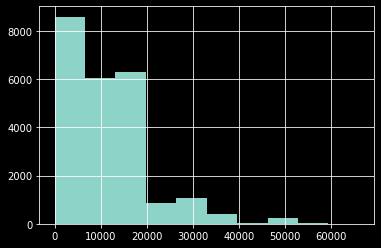

In [68]:
df["city_centers_nearest"].hist()

## ponds_around3000 — число водоёмов в радиусе 3 км / parks_around3000 — парки в радиусе 3 км

In [69]:
df["ponds_around3000"].value_counts(dropna = False)

0.0    9037
1.0    5690
NaN    5516
2.0    1867
3.0    1474
Name: ponds_around3000, dtype: int64

In [70]:
df["parks_around3000"].value_counts(dropna = False)

0.0    10076
1.0     5648
NaN     5516
2.0     1720
3.0      624
Name: parks_around3000, dtype: int64

В целом тут ситуация однотипная, не у кадой крватиры под боком парк/пруд. Заменю пустые значения на 0 и поменяю тип данных.

In [71]:
df["ponds_around3000"] = df["ponds_around3000"].fillna(value = 0)
df["ponds_around3000"] = df["ponds_around3000"].astype('int')
df["ponds_around3000"].dtype

df["parks_around3000"] = df["parks_around3000"].fillna(value = 0)
df["parks_around3000"] = df["parks_around3000"].astype('int')
df["parks_around3000"].dtype


dtype('int64')

In [72]:
df["ponds_around3000"].isna().mean()

0.0

In [73]:
df["parks_around3000"].isna().mean()

0.0

<AxesSubplot:>

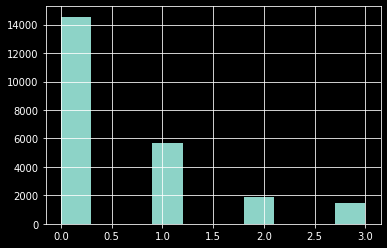

In [74]:
df["ponds_around3000"].hist()

<AxesSubplot:>

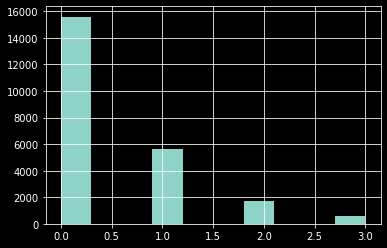

In [75]:
df["parks_around3000"].hist()

## days_exposition — сколько дней было размещено объявление (от публикации до снятия)


In [76]:
df["days_exposition"].value_counts(dropna = False)

NaN       3149
45.0       879
60.0       538
7.0        233
30.0       208
          ... 
818.0        1
969.0        1
1147.0       1
1148.0       1
1174.0       1
Name: days_exposition, Length: 1139, dtype: int64

Оставлю как есть, иначе будут большие искажения в дальнейшем анализе.

<AxesSubplot:>

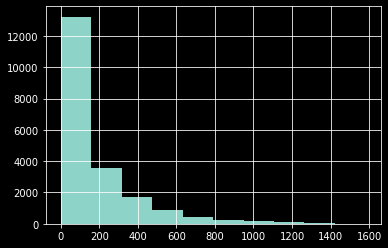

In [77]:
df["days_exposition"].hist()

## kitchen_area — площадь кухни в квадратных метрах (м²)

In [78]:
df["kitchen_area"].value_counts(dropna = False)

NaN      2263
6.00     1300
10.00    1262
8.00     1110
9.00     1100
         ... 
21.87       1
8.98        1
21.25       1
24.89       1
16.74       1
Name: kitchen_area, Length: 962, dtype: int64

In [79]:
df["kitchen_area"].dtype

dtype('float64')

Заполним медианой пропущенные значения в столбцах kitchen_area, тип данных оставляем т.к у нас плавающая точка.

In [80]:
kitchen = df["kitchen_area"] / df["total_area"]

In [81]:
kitchen = kitchen.mean()

In [82]:
df["kitchen_area"] = df["kitchen_area"].fillna(df["total_area"]*kitchen)

In [83]:
df["kitchen_area"].isna().mean()

0.0

## living_area — жилая площадь в квадратных метрах (м²)

In [84]:
df["living_area"].value_counts(dropna = False)

NaN      1892
18.00     882
17.00     675
30.00     598
16.00     486
         ... 
43.81       1
54.43       1
86.10       1
99.70       1
16.74       1
Name: living_area, Length: 1728, dtype: int64

In [85]:
df["living_area"].dtype

dtype('float64')

Заполним медианой пропущенные значения в столбцах living_area, тип данных оставляем т.к у нас плавающая точка.

In [86]:
living = df["living_area"] / df["total_area"]

In [87]:
living = living.mean()

In [88]:
df["living_area"] = df["living_area"].fillna(df["total_area"]*living)

In [89]:
df["living_area"].isna().mean()

0.0

## floors_total — всего этажей в доме / locality_name — название населённого пункта

Удалим строки с пропусками в floors_total, locality_name их доля составляет всего 0,6%.

In [90]:
df["floors_total"].isna().mean()

0.003646540027137042

In [91]:
df["locality_name"].isna().mean()

0.0020776797829036636

In [92]:
df = df.dropna(subset=["floors_total", "locality_name"])

In [93]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863,16028,1,482,2,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,11.000000,2,посёлок Шушары,12817,18603,0,0,0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21741,13933,1,90,2,574.0,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14.0,89.746672,9,False,...,29.851299,0,Санкт-Петербург,28098,6800,2,84,3,234.0,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31856,8098,2,112,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,False,...,13.830000,0,Санкт-Петербург,24665,4232,1,796,3,381.0,NaN
23695,14,3100000,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.000000,4,False,...,8.500000,0,Тосно,0,0,0,0,0,NaN,45.0
23696,18,2500000,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.700000,1,False,...,10.645086,0,село Рождествено,0,0,0,0,0,NaN,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.00,17.0,43.321114,12,False,...,23.300000,2,Санкт-Петербург,39140,10364,2,173,3,196.0,602.0


Мы потеряли  115 строк - для такого ДФ это пока что допустимо.

Смотрим что у нас получилось:

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23450 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23450 non-null  int64  
 1   last_price            23450 non-null  int64  
 2   total_area            23450 non-null  float64
 3   first_day_exposition  23450 non-null  object 
 4   rooms                 23450 non-null  int64  
 5   ceiling_height        23450 non-null  float64
 6   floors_total          23450 non-null  float64
 7   living_area           23450 non-null  float64
 8   floor                 23450 non-null  int64  
 9   is_apartment          23450 non-null  bool   
 10  studio                23450 non-null  bool   
 11  open_plan             23450 non-null  bool   
 12  kitchen_area          23450 non-null  float64
 13  balcony               23450 non-null  int64  
 14  locality_name         23450 non-null  object 
 15  airports_nearest   

day_exposition переведем в формат даты (год-месяц-число) и поместим в новый столбик date

In [95]:
df["date"] = pd.to_datetime(df["first_day_exposition"], format="%Y-%m-%d")
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755.0,NaN,2019-03-07
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,2,посёлок Шушары,12817,18603,0,0,0,NaN,81.0,2018-12-04
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574.0,558.0,2015-08-20
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,89.746672,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234.0,424.0,2015-07-24
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48.0,121.0,2018-06-19


## Названия населенных пунктов

Вернёмся к locality_name и рассмотрим его подробнее,

In [96]:
df["locality_name"].value_counts(dropna = False)

Санкт-Петербург                       15539
посёлок Мурино                          520
посёлок Шушары                          439
Всеволожск                              398
Пушкин                                  368
                                      ...  
поселок Цвылёво                           1
поселок Каложицы                          1
деревня Рапполово                         1
коттеджный поселок Кивеннапа Север        1
деревня Раздолье                          1
Name: locality_name, Length: 364, dtype: int64

In [97]:
df["locality_name"].isna().mean()

0.0

In [98]:
df["locality_name"].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [99]:
df["locality_name"].nunique()

364

364 значения.

Разберемся с различным написанием "поселок городского типа", "поселок", "посёлок" и т.д. 

In [100]:
names = ["городской посёлок ", "городской поселок ", "деревня ", "коттеджный посёлок ", 
        "коттеджный поселок ", "поселок городского типа ", 
        "посёлок городского типа ", "посёлок при железнодорожной станции ", 
        "посёлок станции ", "садоводческое некоммерческое товарищество ", 
        "садовое товарищество ", "село ", "посёлок ", "поселок "]

def locality_name_correct(locality_name):
    for n in names:
        if n in locality_name:
            return locality_name.replace(n, "")
    return locality_name

In [101]:
df["locality_name"] = df["locality_name"].apply(locality_name_correct)

In [102]:
df["locality_name"].nunique()

307

Проверяем что получилось,

In [103]:
df.query('locality_name!="Санкт-Петербург"')["locality_name"].head(20)

1          Шушары
5         Янино-1
6       Парголово
8          Мурино
11      Ломоносов
12      Сертолово
13       Петергоф
14         Пушкин
20      Парголово
22        Кудрово
28         Пушкин
30       Коммунар
33        Колпино
37    Красный Бор
38         Мурино
40      Парголово
42       Петергоф
47        Гатчина
50         Пушкин
53      Парголово
Name: locality_name, dtype: object

Пропуски вызваны тем, что большенство людей живёт в городе СПБ, а не населённом пункте. 

**Вывод:** Была проведена Предобработка наших данных. Мы вывели пропуски в столбцах, по мере необходимости и возможнсти заполнили их. Так же был изменён тип данных в колонках: ponds_around3000, parks_around3000, city_centers_nearest, airports_nearest, balcony, last_price, parks_nearest, is_apartment. Так же были изучены уникальные значения в столбце locality_name. Найдены и устраните редкие и выбивающиеся значения в столбце ceiling_height. Появление пропусков может быть связано с чел. фактор, так и техничесим.

# Посчитайте и добавьте в таблицу новые столбцы

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23450 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23450 non-null  int64         
 1   last_price            23450 non-null  int64         
 2   total_area            23450 non-null  float64       
 3   first_day_exposition  23450 non-null  object        
 4   rooms                 23450 non-null  int64         
 5   ceiling_height        23450 non-null  float64       
 6   floors_total          23450 non-null  float64       
 7   living_area           23450 non-null  float64       
 8   floor                 23450 non-null  int64         
 9   is_apartment          23450 non-null  bool          
 10  studio                23450 non-null  bool          
 11  open_plan             23450 non-null  bool          
 12  kitchen_area          23450 non-null  float64       
 13  balcony         

In [105]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
total_images,20,7,10,0,2,10,6,5,20,18
last_price,13000000,3350000,5196000,64900000,10000000,2890000,3700000,7915000,2900000,5400000
total_area,108.0,40.4,56.0,159.0,100.0,30.4,37.3,71.6,33.16,61.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00,2018-09-10T00:00:00,2017-11-02T00:00:00,2019-04-18T00:00:00,2018-05-23T00:00:00,2017-02-26T00:00:00
rooms,3,1,2,3,2,1,1,2,1,3
ceiling_height,2.7,2.65,2.65,2.65,3.03,2.65,2.65,2.65,2.65,2.5
floors_total,16.0,11.0,5.0,14.0,14.0,12.0,26.0,24.0,27.0,9.0
living_area,51.0,18.6,34.3,89.746672,32.0,14.4,10.6,40.414225,15.43,43.6
floor,8,1,4,9,13,5,6,22,26,7
is_apartment,False,False,False,False,False,False,False,False,False,False


## Цена одного квадратного метра

Мы имеем полную стоюмость квартир, но не знаем цену за кв.м. Создадим новый столбец с этим параметром, рассчитав его сл. образом: Разделим данные столбца last_price — цена на момент снятия с публикации  на total_area — общая площадь квартиры в квадратных метрах (м²)

In [106]:
df["price_meter"] = df["last_price"] / df["total_area"] 
df["price_meter"] = df["price_meter"].astype(int) 
df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date,price_meter
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755.0,NaN,2019-03-07,120370
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,Шушары,12817,18603,0,0,0,NaN,81.0,2018-12-04,82920
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,Санкт-Петербург,21741,13933,1,90,2,574.0,558.0,2015-08-20,92785
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,89.746672,9,False,...,Санкт-Петербург,28098,6800,2,84,3,234.0,424.0,2015-07-24,408176
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856,8098,2,112,1,48.0,121.0,2018-06-19,100000


## День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

Рассчитаем день недели, месяц и год публикации объявления. Результаты запишем в новые колонки weekday, month и year. Укажем в них месяц и год с помощью DatetimeIndex, а день недели dt.weekday.

In [107]:
df["weekday"] = df["date"].dt.weekday
df["month"] = pd.DatetimeIndex(df["date"]).month
df["year"] = pd.DatetimeIndex(df["date"]).year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date,price_meter,weekday,month,year
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,1,482,2,755.0,NaN,2019-03-07,120370,3,3,2019
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,0,0,0,NaN,81.0,2018-12-04,82920,1,12,2018
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,1,90,2,574.0,558.0,2015-08-20,92785,3,8,2015
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,89.746672,9,False,...,2,84,3,234.0,424.0,2015-07-24,408176,4,7,2015
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,2,112,1,48.0,121.0,2018-06-19,100000,1,6,2018


## Тип этажа квартиры (значения — «‎первый», «последний», «другой»);

Проведем категоризацию значений из столбца floors_total — всего этажей в доме. Добавим столбец floor_cat для значений первый, последний, другой. 

Создадим функцию, которая проверит значения "этаж" и передаст результат в floor_cat.

In [108]:
def floor_cat(row):   
    if row["floor"] == 1:
        floor_cat = "первый"
    elif row["floor"] == row["floors_total"]:
        floor_cat = "последний"
    else:
        floor_cat = "другой"
    return floor_cat

df["floor_cat"] = df.apply(floor_cat, axis=1)

df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date,price_meter,weekday,month,year,floor_cat
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,482,2,755.0,NaN,2019-03-07,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,0,0,NaN,81.0,2018-12-04,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,90,2,574.0,558.0,2015-08-20,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,89.746672,9,False,...,84,3,234.0,424.0,2015-07-24,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,112,1,48.0,121.0,2018-06-19,100000,1,6,2018,другой


## Расстояние до центра

Расстояние до центра города указано в метрах переведем из м в км и округлим до целых значений.

In [109]:
df["city_centers_km"] = round(df["city_centers_nearest"] / 1000)

In [110]:
df[["city_centers_nearest", "city_centers_km"]].head()

,city_centers_nearest,city_centers_km
0,16028,16.0
1,18603,19.0
2,13933,14.0
3,6800,7.0
4,8098,8.0


Good

# Проведите исследовательский анализ данных

In [111]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,date,price_meter,weekday,month,year,floor_cat,city_centers_km
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,2,755.0,NaN,2019-03-07,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,0,NaN,81.0,2018-12-04,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,2,574.0,558.0,2015-08-20,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,89.746672,9,False,...,3,234.0,424.0,2015-07-24,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,1,48.0,121.0,2018-06-19,100000,1,6,2018,другой,8.0


Построим гистограммы и изучим их.

**Общая площадь**

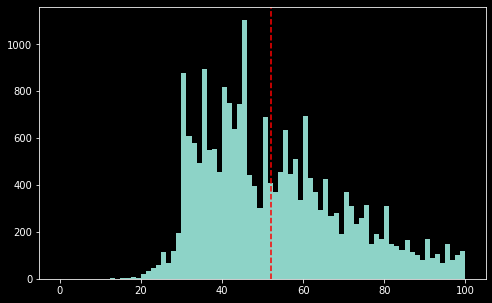

In [112]:
plt.figure(figsize=(8,5))
plt.hist(df["total_area"], range=(0, 100), bins=80)
plt.axvline(df["total_area"].median(), color="r", linestyle="dashed");

Мы видим, что большая часть квартир имеет площадь от 30 до 70 кв.м. Распределение значений похоже на нормальное. Медиана - 52.

**Жилая площадь**

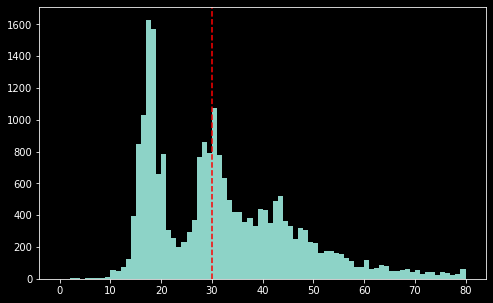

In [113]:
plt.figure(figsize=(8,5))
plt.hist(df["living_area"], range=(0, 80), bins=80)
plt.axvline(df["living_area"].median(), color="r", linestyle="dashed");

Тут большая часть квартир имеет жилую площадь от 15 до 20 / от 28 до 50 кв.м, два пика- около 17 и 31. Медиана - 30.

**Площади кухни**

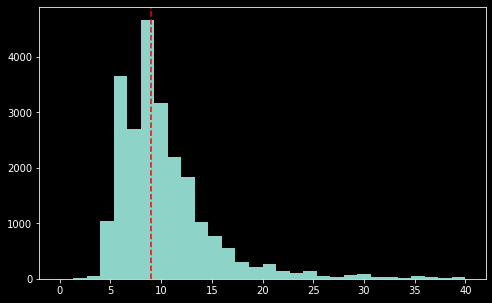

In [114]:
plt.figure(figsize=(8,5))
plt.hist(df["kitchen_area"], range=(0, 40), bins=30)
plt.axvline(df["kitchen_area"].median(), color="r", linestyle="dashed");

Большая часть кухонь имеет площадь от 5 до 15 кв.м. Медиана - 9.

**Цена объекта**

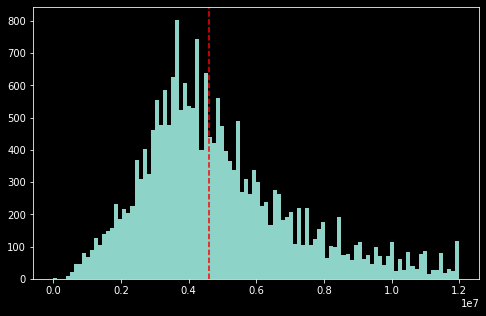

In [115]:
plt.figure(figsize=(8,5))
plt.hist(df["last_price"], range=(0, 12000000), bins=100)
plt.axvline(df["last_price"].median(), color="r", linestyle="dashed");

Большая часть квартир стоит от 2,5 до 6 млн. Медиана - 4.2.

**Количества комнат**

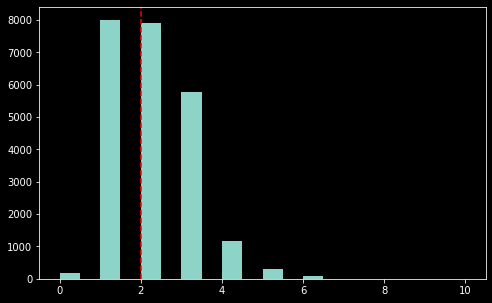

In [116]:
plt.figure(figsize=(8,5))
plt.hist(df["rooms"], range=(0, 10), bins=20)
plt.axvline(df["rooms"].median(), color="r", linestyle="dashed");

Чаще всего квартиры имеют 1-2, или 3 комнаты. 4 и боллее - это редкость. Медиана - 20.

**Высота потолков**

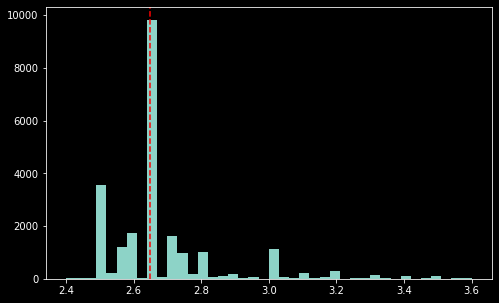

In [117]:
plt.figure(figsize=(8,5))
plt.hist(df["ceiling_height"], range=(2.4, 3.6), bins=40)
plt.axvline(df["ceiling_height"].median(), color="r", linestyle="dashed");

Большая часть квартир имеет потолки от 2.5 до 3 м. Медиана -  2.62м.

**Этаж квартиры**

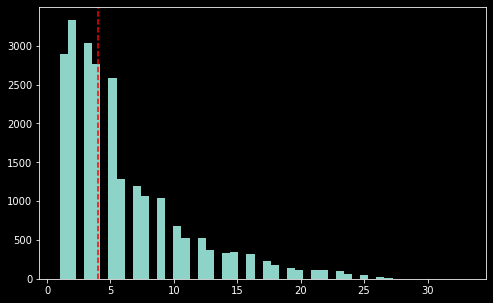

In [118]:
plt.figure(figsize=(8,5))
plt.hist(df["floor"], bins=50);
plt.axvline(df["floor"].median(), color="r", linestyle="dashed");

Большая часть квартир находится на этажах: 1 - 5. Этажи выше 15 - уже редкость. Медиана - 4.

**Тип этажа квартиры («первый», «последний», «другой»)**

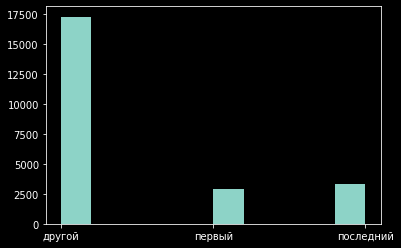

In [119]:
plt.hist(df["floor_cat"]);

Большая часть квартир из категории "другой".

**Общее количество этажей в доме**

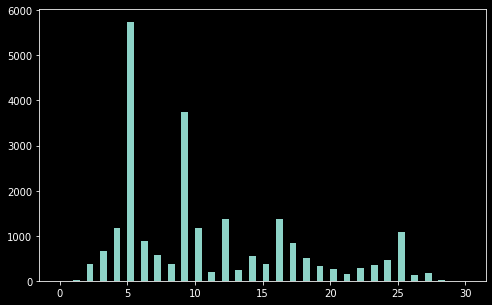

In [120]:
plt.figure(figsize=(8,5))
plt.hist(df["floors_total"], range=(0, 30), bins=60);

Большая часть квартир находится в пяти/девяти - этажках. Небоскрёбов мало.

**Расстояние до центра города в метрах**

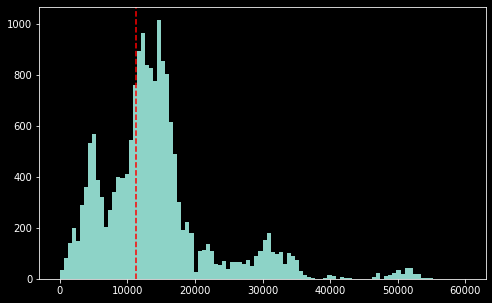

In [121]:
plt.figure(figsize=(8,5))
plt.hist(df["city_centers_nearest"], range=(1, 60000), bins=100)
plt.axvline(df["city_centers_nearest"].median(), color="r", linestyle="dashed");

По моим данным большенство квартир находится в центре. Если брать квартиры за границей города, то большая часть квартир находится от центра на расстоянии от 5 до 15 км. Распределение значений похоже на нормальное. Медиана - около 12 км.

**Расстояние до ближайшего аэропорта**

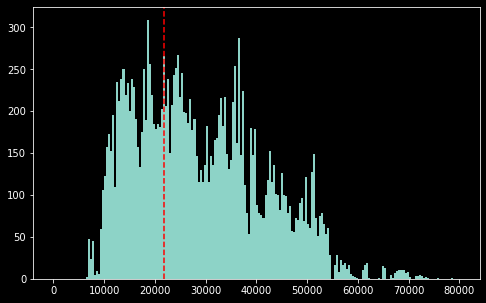

In [122]:
plt.figure(figsize=(8,5))
plt.hist(df["airports_nearest"], range=(1, 80000), bins=200)
plt.axvline(df["airports_nearest"].median(), color="r", linestyle="dashed");

Пустые значения были мною заменены на 0. Я предпологаю, что у большенства квартир нет рядом аэропортов. Часть квартир находится от аэропорта на расстоянии от 10 до 55 км. Медиана - 22 км. Значения более 65 км - редкость.

**Расстояние до ближайшего парка**

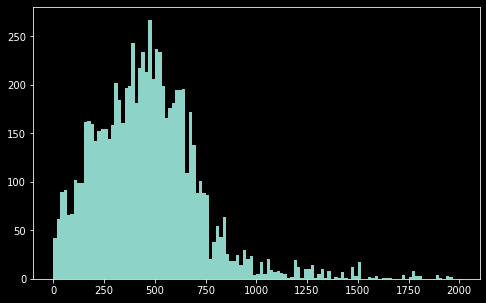

In [123]:
plt.figure(figsize=(8,5))
plt.hist(df["parks_nearest"], range=(1, 2000), bins=120);

Пустые значения были мною заменены на 0. Я предпологаю, что у большенства квартир нет рядом парка. Другая часть квартир находится от парков на расстоянии от 20 до 700 м.Значения более 1000 м - редкость.

**День и месяц публикации объявления**

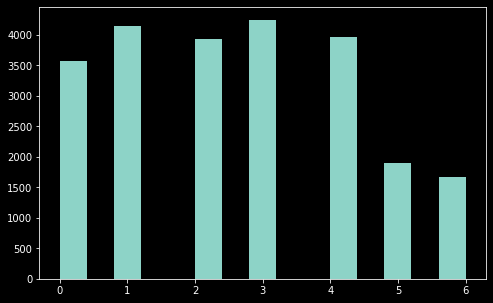

In [124]:
plt.figure(figsize=(8,5))
plt.hist(df["weekday"], bins=15);

Большая часть объявлений публиковалось в будни, самые популярные дни - вторник и четверг. Меньше всего объяв. в выходные дни.

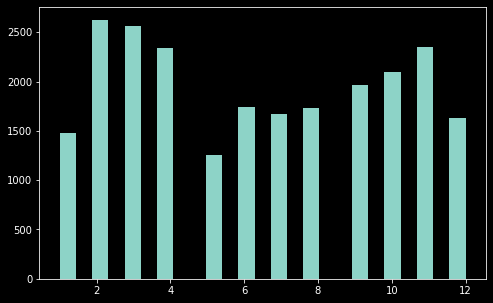

In [125]:
plt.figure(figsize=(8,5))
plt.hist(df["month"], bins=25);

Большая часть объявлений публиковалось в феврале и марте.

# Вывод:

Можно описать среднюю квартиру из объявлений на основе полученных результатов анализа:

* общая площадь около 52 кв.м;
* жилая площадь около 30 кв.м;
* площадь кухни около 9 кв.м;
* цена объекта около 4.2 млн.;
* 1 - 2 комнаты;
* высота потолков 2.62 м;
* 1 - 5 этаж;
* общее количество этажей в доме 5;
* расстояние до центра города около 12 км;
* расстояние до ближайшего аэропорта около 22 км;
* расстояние до ближайшего парка 200-500  м;
* объявление опубликовано во вторник, в феврале.

**Даты размещения (день недели, месяц, год)**

# Продажа квартиры

Изучим, как быстро продавались квартиры days_exposition — сколько дней было размещено объявление (от публикации до снятия). Построем гистограмму.

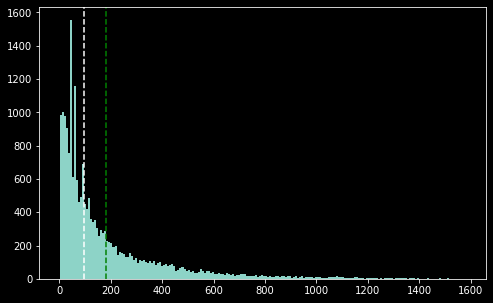

In [126]:
plt.figure(figsize=(8,5))

plt.hist(df["days_exposition"], bins=200)
plt.axvline(df["days_exposition"].median(), color="w", linestyle="dashed")
plt.axvline(df["days_exposition"].mean(), color="g", linestyle="dashed");

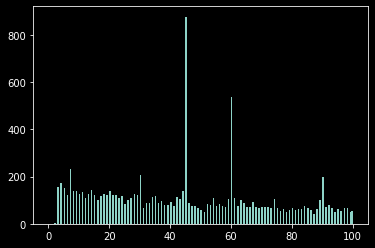

In [127]:
plt.hist(df["days_exposition"], range=(0, 100), bins=200);

Мы видем два пика(примерно 45 и 60 дней). Эти пики - самые популярные сроки размещения, возможно были акции или конкурсы на сайте.

In [128]:
df["days_exposition"].describe()

count    20311.000000
mean       180.258333
std        219.274793
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана 95 меньше среднего значения 180. Обычно продажа занимает от месяца до чуть-больше полугода. Очень быстро квартиры продавались в течение 2 недель. А дольше всего продаются кв. которые стоят уже 400 дней.

# Факторы которые больше всего влияют на общую (полную) стоимость объекта

**Общая площадь**

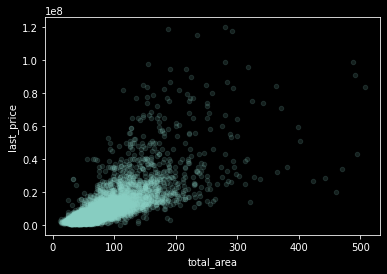

In [129]:
df.plot(x="total_area", y="last_price", kind="scatter", alpha=0.15); 

Чем больше площадь, тем больше концентрация высоких цен на квартиры. Необходимо визуализировать зависимость более отчетливо.

Сгруппируем данные по катагориям значений площади и найдем медиану для каждой группы. Построим график по результатам группировки.

In [130]:
df["total_cat"] = pd.qcut(df["total_area"],20)

df.groupby("total_cat")["last_price"].agg(["count","median"])

,count,median
total_cat,,
"(11.999, 31.0]",1470,2889000
"(31.0, 33.0]",1065,3100000
"(33.0, 35.1]",992,3450000
"(35.1, 37.5]",1179,3550000
"(37.5, 40.0]",1300,3950000
"(40.0, 42.0]",1110,3890000
"(42.0, 44.0]",1174,3830000
"(44.0, 45.9]",1110,4000000
"(45.9, 48.6]",1163,4200000


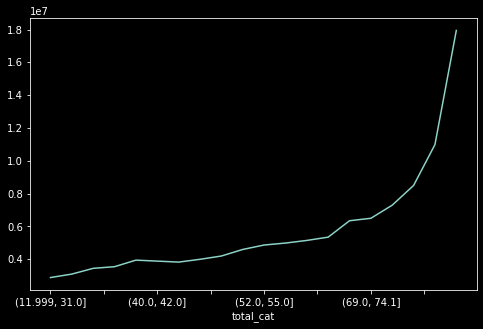

In [131]:
df.groupby("total_cat")["last_price"].median().plot(figsize=(8,5));

In [132]:
df[["total_area", "last_price"]].corr()

,total_area,last_price
total_area,1.000000,0.755834
last_price,0.755834,1.000000


Тут видно прямую зависимость стоимости от площади кв.. С увеличением площади квартир увеличивается их цена. Самые дорогие от 75 кв.м.
Корреляцию между total_area и last_price = 0.7

**Жилая площадь**

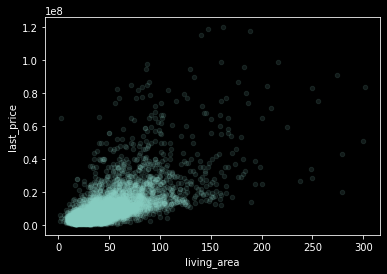

In [133]:
df.plot(x="living_area", y="last_price", kind="scatter", alpha=0.12); 

Чем больше площадь, тем больше концентрация высоких цен на квартиры. Необходимо визуализировать зависимость более отчетливо.

Сгруппируем данные по катагориям значений площади и найдем медиану для каждой группы. Построим график по результатам группировки.

In [134]:
df["living_cat"] = pd.qcut(df["living_area"],16, labels=False)
df.groupby("living_cat")["last_price"].agg(["count", "median"])

,count,median
living_cat,,
0,1473,3400000
1,1816,3400000
2,1837,3300000
3,1013,3650000
4,1255,4000000
5,1407,4050000
6,1467,4050000
7,1670,4185000
8,1257,4600000


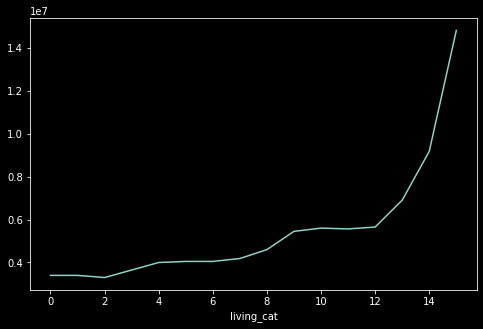

In [135]:
df.groupby("living_cat")["last_price"].median().plot(figsize=(8,5));

In [136]:
df[["living_area", "last_price"]].corr()

,living_area,last_price
living_area,1.000000,0.674664
last_price,0.674664,1.000000


Мы видим зависимость: чем больше квартиры по площади, тем выше в среднем их стоимость. Корреляция = 0.67

**Площадь кухни**

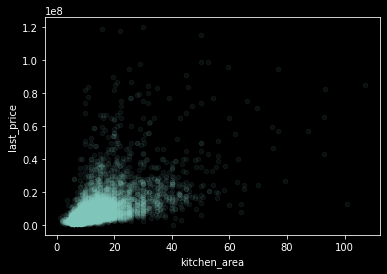

In [137]:
df.plot(x="kitchen_area", y="last_price", kind="scatter", alpha=0.07); 

Действия аналогичны. 

In [138]:
df["kitchen_cat"] = pd.qcut(df["kitchen_area"],11, labels=False)
df.groupby("kitchen_cat")["last_price"].agg(["count", "median"])

,count,median
kitchen_cat,,
0,2149,3100000
1,2123,3549000
2,2267,3990000
3,2051,4300000
4,2070,4003000
5,2200,4380000
6,2095,4800000
7,2209,5200000
8,2044,6000000


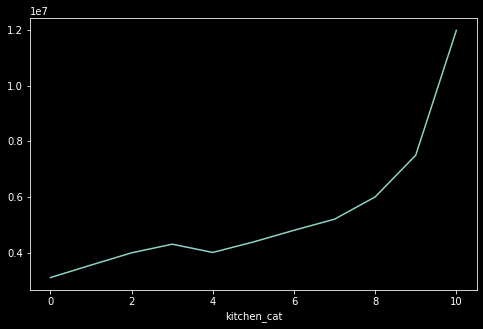

In [139]:
df.groupby("kitchen_cat")["last_price"].median().plot(figsize=(8,5));

In [140]:
df[["kitchen_area", "last_price"]].corr()

,kitchen_area,last_price
kitchen_area,1.000000,0.601812
last_price,0.601812,1.000000


Чем больше площадь, тем выше в их стоимость. Корреляция = 0.6

**Количество комнат**

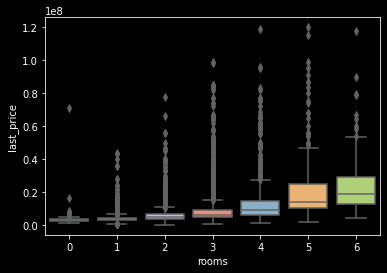

In [141]:
sns.boxplot(data = df, x = "rooms", y = "last_price");

In [142]:
df[["rooms", "last_price"]].corr()

,rooms,last_price
rooms,1.000000,0.440219
last_price,0.440219,1.000000


С увеличением количества комнат - увеличиваются цена.

**Типа этажа, на котором расположена квартира (первый, последний, другой)**

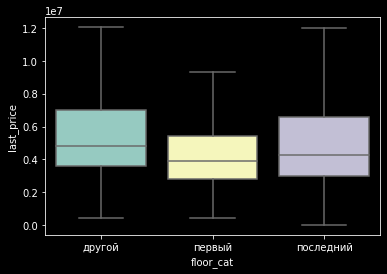

In [143]:
sns.boxplot(data= df, x="floor_cat", y="last_price", showfliers=False);

Высокие цены на недвижимость у нас в категории "другой", далее в  "последний", ну а на первом этаже квартире дешевле.

**Даты размещения (день недели, месяц, год)**

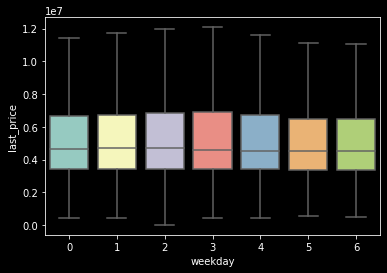

In [144]:
sns.boxplot(data= df, x="weekday", y="last_price", showfliers=False);

Тут видно, что день недели не влияет на стоимость.

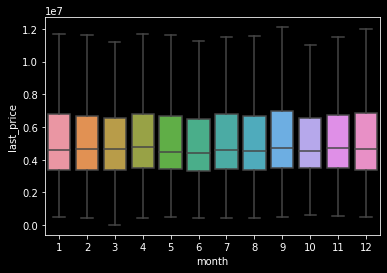

In [145]:
sns.boxplot(data= df, x="month", y="last_price", showfliers=False);

Тут ситуация схожа, ед. медиана у апреля выше отсальных.

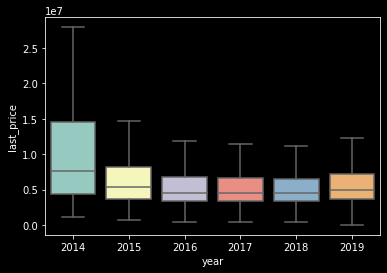

In [146]:
sns.boxplot(data= df, x="year", y="last_price", showfliers=False);

Всё тоже самое. Медиана чуть больше у объектов, размещенных в 2014 году.

# Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для начала найдём 10 населённых пунктов с наибольшим числом объявлений. Создадим словарь name с названием таких пунктов. Воспользуемся методом value_counts для выборки нужных объявлений из общих данных.

In [147]:
name = df["locality_name"].value_counts().head(10) 
name

Санкт-Петербург    15539
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               368
Колпино              337
Парголово            326
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

Выполним срез общих данных по индексам из полученного словаря. Результаты запишем в новый датасет top_name. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [148]:
top_name = df.query("locality_name in @name.index")
top_name.pivot_table(index="locality_name", values="price_meter").sort_values(by="price_meter", ascending=False)

,price_meter
locality_name,
Санкт-Петербург,113694.116739
Пушкин,103100.445652
Кудрово,95260.393617
Парголово,90331.840491
Мурино,86040.658703
Шушары,78550.883827
Колпино,75332.866469
Гатчина,68745.693811
Всеволожск,68654.007538


На нешем списке видно, что самая высокая средняя стоимость кв.метра в Санкт-Петербург (105632), а самая низкая в Выборге (57932)

# Средняя цена каждого километра в Санкт-Петербурге

Рассмотрим подробнее квартиры из Санкт-Петербурга. Определим, как стоимость объектов зависит от расстояния до центра города.

Выполним срез общих данных по названию города, результат запишем в новый датасет spb.

In [149]:
spb = df.query('locality_name=="Санкт-Петербург"').copy()
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,date,price_meter,weekday,month,year,floor_cat,city_centers_km,total_cat,living_cat,kitchen_cat
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,2019-03-07,120370,3,3,2019,другой,16.0,"(92.0, 113.0]",13,10
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,2015-08-20,92785,3,8,2015,другой,14.0,"(55.0, 58.0]",9,4
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14.0,89.746672,9,False,...,2015-07-24,408176,4,7,2015,другой,7.0,"(113.0, 507.0]",15,10
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,2018-06-19,100000,1,6,2018,другой,8.0,"(92.0, 113.0]",9,10
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.414225,22,False,...,2019-04-18,110544,3,4,2019,другой,12.0,"(69.0, 74.1]",11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.300000,4,False,...,2018-02-28,100566,2,2,2018,другой,16.0,"(35.1, 37.5]",1,5
23690,3,5500000,52.00,2018-07-19T00:00:00,2,2.65,5.0,31.000000,2,False,...,2018-07-19,105769,3,7,2018,другой,6.0,"(48.6, 52.0]",8,1
23691,11,9470000,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.300000,7,False,...,2016-10-13,129903,3,10,2016,другой,4.0,"(69.0, 74.1]",11,7
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,False,...,2017-03-21,72490,1,3,2017,другой,4.0,"(113.0, 507.0]",15,9


Рассчитаем стоимость каждого километра от центра всех объявлений. Разделим колонку price_meter (цена за кв.м) на city_centers_km. Результаты запишем в новый столбец price_km с округлением до целого. Создадим функцию price_km, которая проведет данные вычисления с условием, если значение столбца city_centers_km равно нулю, то в столбец просто вносим числа из price_meter без деления.

In [150]:
spb["city_centers_km"] = spb["city_centers_km"].astype(int)

In [151]:
def price_km(row):   
    if row["city_centers_km"] == 0:
        price_km = row["price_meter"]
    else:
        price_km = row["price_meter"]/row["city_centers_km"]
    return int(price_km)

spb["price_km"] = spb.apply(price_km, axis=1) #

spb[["price_meter", "city_centers_km", "price_km"]].head() 

,price_meter,city_centers_km,price_km
0,120370,16,7523
2,92785,14,6627
3,408176,7,58310
4,100000,8,12500
7,110544,12,9212


In [152]:
df["city_centers_km"].value_counts(dropna=False)

0.0     5524
12.0    1597
15.0    1561
13.0    1451
14.0    1276
        ... 
63.0       1
57.0       1
59.0       1
62.0       1
61.0       1
Name: city_centers_km, Length: 61, dtype: int64

Good 
Построим график зависимости для средних значений стоимости за каждый километр.

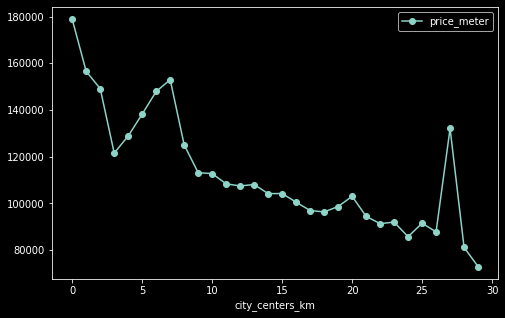

In [153]:
aver_price_spb = spb.pivot_table(index = "city_centers_km", values= "price_meter") 
aver_price_spb.plot(style="o-", figsize=(8,5));

In [154]:
spb["price_km"].median()

8691.0

In [155]:
df[df["city_centers_km"] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,date,price_meter,weekday,month,year,floor_cat,city_centers_km,total_cat,living_cat,kitchen_cat
109,2,7497600,62.5,2015-12-08T00:00:00,2,2.65,5.0,35.5,5,False,...,2015-12-08,119961,1,12,2015,последний,27.0,"(60.8, 64.3]",10,5
140,8,16912000,105.7,2016-12-09T00:00:00,2,2.70,3.0,48.4,1,False,...,2016-12-09,160000,4,12,2016,первый,27.0,"(92.0, 113.0]",13,9
439,9,8570000,72.0,2018-08-11T00:00:00,3,3.00,6.0,42.0,4,False,...,2018-08-11,119027,5,8,2018,другой,27.0,"(69.0, 74.1]",11,6
556,0,3500000,28.5,2018-06-06T00:00:00,1,2.50,5.0,16.0,4,False,...,2018-06-06,122807,2,6,2018,другой,27.0,"(11.999, 31.0]",1,0
558,13,4500000,65.5,2017-10-27T00:00:00,3,2.60,10.0,42.0,7,False,...,2017-10-27,68702,4,10,2017,другой,27.0,"(64.3, 69.0]",11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22503,8,5299000,56.0,2018-03-30T00:00:00,3,2.50,5.0,38.0,2,False,...,2018-03-30,94625,4,3,2018,другой,27.0,"(55.0, 58.0]",10,2
22544,3,3000000,37.0,2015-12-04T00:00:00,1,2.65,12.0,14.0,4,False,...,2015-12-04,81081,4,12,2015,другой,27.0,"(35.1, 37.5]",0,6
22619,8,6000000,50.0,2018-09-25T00:00:00,3,2.50,9.0,39.0,9,False,...,2018-09-25,120000,1,9,2018,последний,27.0,"(48.6, 52.0]",11,1
23286,5,2450000,32.0,2017-03-09T00:00:00,1,2.50,9.0,20.0,1,False,...,2017-03-09,76562,3,3,2017,первый,27.0,"(31.0, 33.0]",4,1


На графике мы видим, что Цена за один квадратный метр(price_meter) напрямую зависит от расстояния до центра(city_centers_km). от 1 до 6 км - цена самая высокая за кв.м, дальше идёт на спадт - чем дальше от центра - тем квадратный метр дешевле. Имеется импульсивный скачёк на расстоянии 27-28 км от центра. Не совсем понял с чем это связано, для точности нужно больше данных. Средняя цена по медиане за км - 8691.

# Общий вывод

  В вашем распоряжении данны сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. В процессе анализа были выведены ошибки чел. фактора (высота потолков, название населённого пункта), так же замечены пропуски в парках, аэоропорты, водоёмы), вероятно их возникновение связано с проблемами при выгзруке данных. 

Мы определили факторы, которые больше всего влияют на рыночную стоимость объектов недвижимости: 
* площадь;
* число комнат;
* расположение на определенном этаже;
* расстояние от центра;
* дата размещения (год).
Сильнее всего: площадь, расстояние от центра.
Средняя продолжительность продажи квартир - пол года.

К дорогим квартирам принадлежат парраметры: расположена в центре Санкт-Петербурга, число комнат больше 4, общая площадь от 75 кв.м, этаж - не 1й и не последний, выставлена на продажу в 2019 году.

К хорошим: находится в районе 5-10 км от центра. Небольшое количество комнат (1-2). Расположение квартиры на первом этаже.

Для лучшего качества анализа необходимо увеличить объём объявлений и устранить причины появления пропусков.